---

<b>Project description </b>

You've done beautifully in the Practicum course, and you've been offered an internship in the analytical department at Yandex.Afisha. Your first task is to help optimize marketing expenses.
You have:
•	Server logs with data on Yandex.Afisha visits from June 2017 through May 2018

•	Dump file with all orders for the period

•	Marketing expenses statistics

You are going to study:

•	How people use the product

•	When they start to buy

•	How much money each customer brings

•	When they pay off


#  1. Downloading and preparing the data for analysis

In [1]:
#importing necessary libraries and reading data from csv files
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
plt.style.use("fivethirtyeight")
visits = pd.read_csv('/datasets/visits_log_us.csv' )
orders = pd.read_csv('/datasets/orders_log_us.csv')
costs = pd.read_csv('/datasets/costs_us.csv')

import warnings
warnings.filterwarnings('ignore')


In [2]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
Device       359400 non-null object
End Ts       359400 non-null object
Source Id    359400 non-null int64
Start Ts     359400 non-null object
Uid          359400 non-null uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB


In [3]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
Buy Ts     50415 non-null object
Revenue    50415 non-null float64
Uid        50415 non-null uint64
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB


In [4]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
source_id    2542 non-null int64
dt           2542 non-null object
costs        2542 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB


In [5]:
# checking for missing values
visits.isnull().sum()
#costs.isnull().sum()
#orders.isnull().sum()

Device       0
End Ts       0
Source Id    0
Start Ts     0
Uid          0
dtype: int64

In [6]:
#visits.duplicated()
costs.duplicated().sum()
#orders.duplicated()

0

<b>After pulling out the information from each dataframe, we can deternime that the date columns are not in correct DataFrame. Each data frame has between 3-5 columns. There are no duplicates and no null values (fairly easy to work with)</b>

In [7]:
#printing first few rows of visits dataframe
visits.head()

,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


In [8]:
#printing first few rows of orders dataframe
orders.head()

,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


In [9]:
##printing first few rows of orders dataframe
costs.head()

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


<b>The information we can extract from the skeleton of these tables is that Visists and orders can be join by Uid but costs seams a bit isolated</b>

In [10]:
# making columns lowercase
visits.columns = visits.columns.str.lower()
orders.columns = orders.columns.str.lower()
costs.columns = costs.columns.str.lower()

In [11]:
#changing data types of columns
visits['start ts'] =  pd.to_datetime(visits['start ts'], format="%Y.%m.%d %H:%M")
visits['end ts'] =  pd.to_datetime(visits['end ts'], format="%Y.%m.%d %H:%M") 
orders['Buy ts'] =  pd.to_datetime(orders['buy ts'], format="%Y.%m.%d %H:%M")
costs['dt']=  pd.to_datetime(costs['dt'], format="%Y.%m.%d")

In [12]:
#Changing the data types and creating year, month and week columns
visits['year']  = visits['start ts'].dt.year
visits['month'] = visits['start ts'].dt.month
visits['week'] = visits['start ts'].dt.week
visits['day'] = visits['start ts'].dt.date

In [13]:
visits['device'] = visits['device'].astype('category')

# 2. Making reports and calculating metrics:

## Product:
<ul>
<li>How many people use it every day, week, and month?</li>
<li>How many sessions are there per day?</li>
<li>What is the length of each session?</li>
<li>How often do users come back?</li>


### How many people use it every day, week, and month?

<div> Determning User Activity<br>

DAU — the number of daily active (unique) users<br>
WAU — the number of weekly active users<br>
MAU — the number of monthly active users</div>

In [14]:
mau = visits.groupby(['year','month']).agg({'uid': 'nunique'}).reset_index()
mau_total = mau.uid.mean()
dau = visits.groupby('day').agg({'uid': 'nunique'}).reset_index()
dau_total = dau.uid.mean()
wau = visits.groupby(['year', 'week']).agg({'uid': 'nunique'}).reset_index()
wau_total = wau.uid.mean()

In [15]:
print('Average visits per month: {}'.format(round(mau_total)))
print('Average visits per week: {}'.format(round(wau_total)))
print('Average visits per day: {}'.format(round(dau_total)))

Average visits per month: 23228
Average visits per week: 5716
Average visits per day: 908


This is a very normal pace for any healthy business

### How many sessions are there per day?

In [16]:
# let's determine the sessions per day
sessions_per_day = visits.groupby('day').agg({'uid': 'count'}).reset_index()
avg_sessions_per_day = sessions_per_day.mean()
print('Average sessions per day: {}'.format(int(avg_sessions_per_day)))

Average sessions per day: 987


In [17]:
# Average number of sessions per user
avg_session_per_user = avg_sessions_per_day/dau_total
print('Average number of sessions per user: {}'.format(avg_session_per_user))

Average number of sessions per user: uid    1.087414
dtype: float64


In [18]:
# Average number of sessions per user for the touch device
avg_sessions_touch = visits[visits['device']=='touch'].groupby('day').agg({'uid': 'count'}).mean()
print('Average number of sessions per user from touch: {}'.format(int(avg_sessions_touch)))

Average number of sessions per user from touch: 266


In [19]:
# Average number of sessions per user for the Desktop device
avg_sessions_desktop = visits[visits['device']=='desktop'].groupby('day').agg({'uid': 'count'}).mean()
print('Average number of sessions per user from desktop: {}'.format(int(avg_sessions_desktop)))


Average number of sessions per user from desktop: 721


<b>Brief Conclusion:<b><br>
Users clearly prefer Desktop devices over the touch ones. Either it's a preference or a technical issue with the touch ( This needs to be investigated) 


---------------------------------------------------------------------------------------------------------------------------

### What is the length of each session?

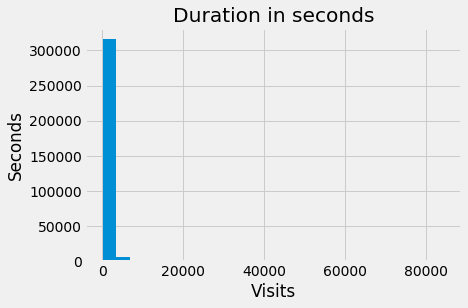

the mean duration is 11 minutes


In [20]:
visits['session_duration_sec'] = (visits['end ts'] - visits['start ts']).dt.seconds
visits = visits[visits['session_duration_sec']!= 0]
visits['session_duration_sec'].hist(bins=25)
plt.title('Duration in seconds')
plt.xlabel('Visits')
plt.ylabel('Seconds')
asl = visits['session_duration_sec'].mode()
plt.show()
asl_mean = int(visits['session_duration_sec'].mean()/60)
print('the mean duration is {} minutes'.format(asl_mean))

In [21]:
print("The Mode for the Session Length is:", visits['session_duration_sec'].mode())

The Mode for the Session Length is: 0    60
dtype: int64


In [22]:
print("The Median for the Session Length is:", visits['session_duration_sec'].median())

The Median for the Session Length is: 360.0


This is NOT a normal distribution therefore the mean is not the prefered metric

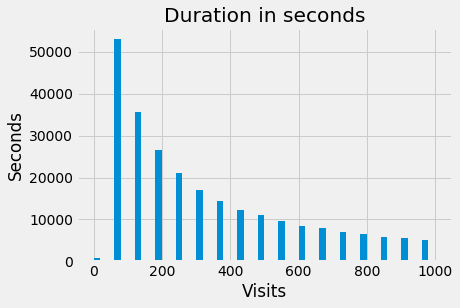

In [23]:
# Let's determine the session duration per seconds

visits = visits[visits['session_duration_sec']!= 0]
visits['session_duration_sec'].hist( bins=50, range=(0, 1000))
plt.title('Duration in seconds')
plt.xlabel('Visits')
plt.ylabel('Seconds')
plt.show()


In [24]:
# let's determine the session duration per devices ( based on median)
device_dis=visits.groupby('device')['session_duration_sec'].median().reset_index()
device_dis

,device,session_duration_sec
0,desktop,420
1,touch,240


<b>Brief Conclusion:<b><br>
Users spend more time on Desktops than touch devices 


-------------------------------------------------------------------------------------------------------------------------------

### How often do users come back?

In [25]:
visit = visits[['day', 'uid']]
visits.head(3)

,device,end ts,source id,start ts,uid,year,month,week,day,session_duration_sec
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017,12,51,2017-12-20,1080
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018,2,8,2018-02-19,1680
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018,5,20,2018-05-20,1440


In [26]:
# creating a first user visit table
visits['day'] = pd.to_datetime(visits['day'])
first_user_visit = visits.groupby(['uid'])['day'].min().reset_index()
first_user_visit.columns = ['uid', 'first_user_visit']
first_user_visit.head(5)

,uid,first_user_visit
0,11863502262781,2018-03-01
1,49537067089222,2018-02-06
2,297729379853735,2017-06-07
3,313578113262317,2017-09-18
4,325320750514679,2017-09-30


In [27]:
# let's join the visits and first user visits tables and convert their data types 
visits_1st_visit = visits.join(first_user_visit.set_index('uid'), on= 'uid')
visits_1st_visit['first_user_visit'] = visits_1st_visit['first_user_visit'].astype('datetime64[M]')
visits_1st_visit['visit_month'] = visits_1st_visit['day'].astype('datetime64[M]') 

In [28]:
# let's create on cohort_lifetime

visits_cohorts = visits_1st_visit.groupby(['first_user_visit','visit_month']).agg({'uid':'nunique'}).reset_index()
visits_cohorts['cohort_lifetime'] = visits_cohorts['visit_month'] - visits_cohorts['first_user_visit']
visits_cohorts.head(7)

,first_user_visit,visit_month,uid,cohort_lifetime
0,2017-06-01,2017-06-01,11885,0 days
1,2017-06-01,2017-07-01,900,30 days
2,2017-06-01,2017-08-01,606,61 days
3,2017-06-01,2017-09-01,710,92 days
4,2017-06-01,2017-10-01,777,122 days
5,2017-06-01,2017-11-01,802,153 days
6,2017-06-01,2017-12-01,686,183 days


In [29]:
visits_cohorts['cohort_lifetime'] = visits_cohorts['cohort_lifetime'] / np.timedelta64(1,'M')
visits_cohorts['cohort_lifetime'] =  visits_cohorts['cohort_lifetime'].round().astype('int')
visits_cohorts['first_user_visit'] = visits_cohorts['first_user_visit'].dt.strftime('%Y-%m') 




In [30]:
cohorts = visits_cohorts

In [31]:
#sorting unique users 
first_users_count = cohorts[cohorts['cohort_lifetime'] == 0][['first_user_visit','uid']]
first_users_count = first_users_count.rename(columns={'user_id':'cohort_customers'}) 


In [32]:
cohorts = cohorts.merge(first_users_count,on='first_user_visit')

In [33]:
visits_cohorts.head(3)

,first_user_visit,visit_month,uid,cohort_lifetime
0,2017-06,2017-06-01,11885,0
1,2017-06,2017-07-01,900,1
2,2017-06,2017-08-01,606,2


In [34]:
cohorts.columns = ['first_user_visit', 'visit_month', 'uid_month', 'cohort_lifetime', 'uid_init']
cohorts.head() 


,first_user_visit,visit_month,uid_month,cohort_lifetime,uid_init
0,2017-06,2017-06-01,11885,0,11885
1,2017-06,2017-07-01,900,1,11885
2,2017-06,2017-08-01,606,2,11885
3,2017-06,2017-09-01,710,3,11885
4,2017-06,2017-10-01,777,4,11885


In [35]:
cohorts['retention'] = cohorts['uid_month']/cohorts['uid_init']
retention_pivot = cohorts.pivot_table(index='first_user_visit',
                                      columns='cohort_lifetime',
                                      values='retention',
                                      aggfunc='sum')

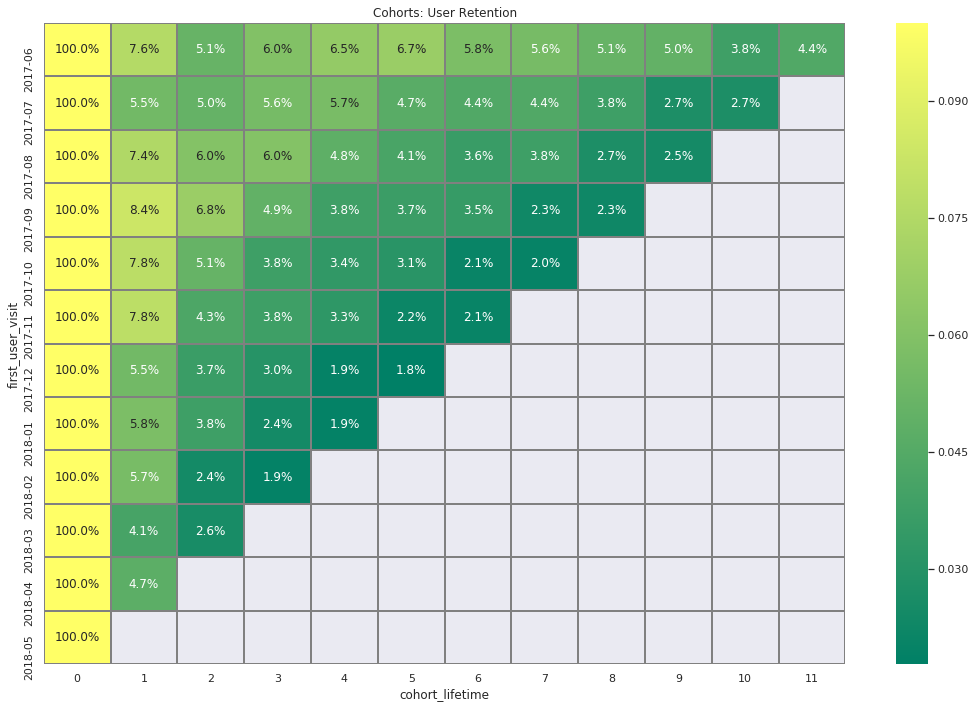

In [36]:
sns.set(style='dark')
plt.figure(figsize=(16, 11))
plt.title('Cohorts: User Retention')
sns.heatmap(retention_pivot, annot=True, fmt='.1%', vmax = .1, linewidths=1, linecolor='gray', cmap = 'summer'); 

It seems that a  small percentage users return even though each month we record a significant amount of new visitors. The highest retention happend in 09/2017

*********************************************************************************************************************


<b>Conclusion Product:<b><br>
The business is getting steady traffic as the user metrics showed across all devices ( though led by Desktop devices).
It it important to note that these sessions might have outliers. Sessions go from 00 secs to 4 hours - to get a more accurate number, an extended study maybe needed. 
The representation of the cohort analysis shows the average number of purchases per bueyr by lifetime mounth. We can see that visitors do not turn into buyers right away, it also shows which cohort is the most lucrative.The average number of purchases per customer grows overtime. The intersection between September and December 2017 has the highest number.
It is now time to determine how many of those visitors who return often actually turn into customers and at which rate the start buying.


## Sales
<ul>
<li>When do people start buying?</li>
<li>How many orders do they make during a given period of time?</li>
<li>What is the average purchase size?</li>
<li>How much money do they bring? (LTV)</li>
</ul>

### When do people start buying?

In [37]:
# let's determine the orders based on visits 
orders['order_date'] = orders['buy ts'].astype('datetime64[M]')
orders['order_date'] = pd.to_datetime(orders['order_date'])
first_user_orders = orders.groupby(['uid'])['order_date'].min().reset_index()
visit_orders = first_user_orders.merge(first_user_visit, on ='uid')
#visit_orders['conversion'] = visit_orders['order_date'] - visit_orders['first_user_visit']
#visit_orders['conversion'] = visit_orders['conversion'].dt.days.astype('int')
visit_orders.head(10)

,uid,order_date,first_user_visit
0,313578113262317,2018-01-01,2017-09-18
1,1575281904278712,2017-06-01,2017-06-03
2,2429014661409475,2017-10-01,2017-10-11
3,2464366381792757,2018-01-01,2018-01-27
4,2551852515556206,2017-11-01,2017-11-24
5,3077748354309989,2018-03-01,2018-03-03
6,3605148382144603,2017-09-01,2017-08-15
7,3753586865891862,2018-03-01,2018-03-03
8,4808417689019433,2018-01-01,2018-01-09
9,4992223027560440,2018-04-01,2018-04-04


Detefinetely not easy to tell - some days are more successfuly than others.

### How many orders do they make during a given period of time?

In [38]:
orders['order_month'] = orders['order_date'].astype('datetime64[M]')

orders['order_date'] = pd.to_datetime(orders['order_date'])
orders_count = orders.groupby('order_month')['order_date'].count().reset_index()
orders_count.head(10)

,order_month,order_date
0,2017-06-01,2354
1,2017-07-01,2363
2,2017-08-01,1807
3,2017-09-01,3387
4,2017-10-01,5679
5,2017-11-01,5659
6,2017-12-01,6218
7,2018-01-01,4721
8,2018-02-01,5281
9,2018-03-01,5326


### What is the average purchase size?

In [39]:
#let's describe the data in the order table
orders.revenue.describe()

count    50415.000000
mean         4.999647
std         21.818359
min          0.000000
25%          1.220000
50%          2.500000
75%          4.890000
max       2633.280000
Name: revenue, dtype: float64

In [40]:
#let's determine the overall average order 
num_order_month = orders.groupby('order_month')['revenue'].sum().reset_index()
num_order_month.mean()

revenue    19389.015385
dtype: float64

<b>Brief Conclusion:<b><br>
Apperently the sites records 5 orders per day and 19389 orders per months - this is a bit off. It his important to note that the data might have outliers or some days are far more lucrative while the other days are at their absolute worst. 

### How much money do they bring? (LTV)

In [41]:
# let's determine when the first purchase occur per user
first_user_orders = orders.groupby('uid').agg({'buy ts': 'min'}).reset_index()
first_user_orders.columns = ['uid', 'first_order_month']
first_user_orders.first_order_month = first_user_orders['first_order_month'].astype('datetime64[M]')
first_user_orders.head() 

,uid,first_order_month
0,313578113262317,2018-01-01
1,1575281904278712,2017-06-01
2,2429014661409475,2017-10-01
3,2464366381792757,2018-01-01
4,2551852515556206,2017-11-01


In [42]:
# Let's merger the first user order table with the orders table. 
orders_com = pd.merge(first_user_orders, orders, on='uid')
orders_com.head()

,uid,first_order_month,buy ts,revenue,Buy ts,order_date,order_month
0,313578113262317,2018-01-01,2018-01-03 21:51:00,0.55,2018-01-03 21:51:00,2018-01-01,2018-01-01
1,1575281904278712,2017-06-01,2017-06-03 10:13:00,1.22,2017-06-03 10:13:00,2017-06-01,2017-06-01
2,1575281904278712,2017-06-01,2017-06-03 17:39:00,1.83,2017-06-03 17:39:00,2017-06-01,2017-06-01
3,2429014661409475,2017-10-01,2017-10-11 18:33:00,73.33,2017-10-11 18:33:00,2017-10-01,2017-10-01
4,2464366381792757,2018-01-01,2018-01-28 15:54:00,2.44,2018-01-28 15:54:00,2018-01-01,2018-01-01


In [43]:
# Let's determine the LTV
ltv = orders_com.groupby(['first_order_month']).agg({'revenue': 'sum', 'uid':'nunique'}).reset_index()
ltv.rename(columns = {'uid':'n_customers'}, inplace=True)
ltv

,first_order_month,revenue,n_customers
0,2017-06-01,24031.69,2023
1,2017-07-01,16127.92,1923
2,2017-08-01,11606.26,1370
3,2017-09-01,34676.32,2581
4,2017-10-01,27603.45,4340
5,2017-11-01,26098.99,4081
6,2017-12-01,33485.74,4383
7,2018-01-01,16663.13,3373
8,2018-02-01,16750.50,3651
9,2018-03-01,19273.41,3533


This is the total revenue per cohort. The most revenue occurred in September 2017 

In [44]:
#let's set the cohorts to work with
ltv['ltv'] = ltv['revenue'] / ltv['n_customers']
ltv['ltv'] = ltv['ltv'].round(decimals=2)
ltv

,first_order_month,revenue,n_customers,ltv
0,2017-06-01,24031.69,2023,11.88
1,2017-07-01,16127.92,1923,8.39
2,2017-08-01,11606.26,1370,8.47
3,2017-09-01,34676.32,2581,13.44
4,2017-10-01,27603.45,4340,6.36
5,2017-11-01,26098.99,4081,6.40
6,2017-12-01,33485.74,4383,7.64
7,2018-01-01,16663.13,3373,4.94
8,2018-02-01,16750.50,3651,4.59
9,2018-03-01,19273.41,3533,5.46


The analysis is starting to show meaningful results, now let's link them to sources

In [45]:
#let's combine the first 
ltv_ = orders_com.groupby(['first_order_month', 'order_month']).agg({'revenue': 'sum'}).reset_index()
report = pd.merge(ltv, ltv_, on='first_order_month')
report = report.drop('revenue_x', axis =1) 
report = report.rename(columns = {'revenue_y':'revenue'})

In [46]:
report['age'] = (report['order_month'].astype('datetime64[M]')  - report['first_order_month'].astype('datetime64[M]') ) / np.timedelta64(1, 'M')
report['age'] = report['age'].round().astype('int')
report['ltv'] = report['revenue'] / report['n_customers']


In [47]:
### Creating a pivot table for the first order month by age and lTV
conversion_pivot = report.pivot_table(
    index= 'first_order_month', 
    columns='age', 
    values='ltv', 
    aggfunc='mean')
conversion_pivot = conversion_pivot.cumsum(axis=1).round(decimals=2)
conversion_pivot.fillna('')

age,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06-01,4.72,5.21,5.65,6.6,7.62,8.36,9.31,9.89,10.45,11.05,11.62,11.88
2017-07-01,6.01,6.35,6.97,7.33,7.5,7.66,7.78,7.92,8.08,8.23,8.39,
2017-08-01,5.28,5.75,6.21,6.6,7.09,7.38,7.59,7.99,8.28,8.47,,
2017-09-01,5.64,6.76,7.28,11.26,11.66,12.31,13.01,13.25,13.44,,,
2017-10-01,5.00,5.54,5.73,5.89,6.04,6.16,6.24,6.36,,,,
2017-11-01,5.15,5.55,5.75,6.08,6.23,6.28,6.4,,,,,
2017-12-01,4.74,5,5.92,6.99,7.3,7.64,,,,,,
2018-01-01,4.14,4.43,4.73,4.88,4.94,,,,,,,
2018-02-01,4.16,4.44,4.51,4.59,,,,,,,,


In [48]:
conversion_pivot.mean()

age
0      4.801538
1      5.396364
2      5.821000
3      6.691111
4      7.297500
5      7.970000
6      8.388333
7      9.082000
8     10.062500
9      9.250000
10    10.005000
11    11.880000
dtype: float64

<b>Conclusion Sales:<b><br>
The cohort cost analysis shows which months did siginificanly better. September and December 2017 stood out maybe because of student going back to school and the holidays? December also had the highest number in cost but September had a lower cost than many months but still had better revenue than most


## Marketing

<ul>
<li>How much money was spent? Overall/per source/over time</li>
<li>How much did customer acquisition from each of the sources cost?</li>
<li>How worthwhile where the investments? (ROI)</li>
</ul>

### How much money was spent? Overall/per source/over time

In [49]:
#How much money was spent
print('The overall money spent is:',round(sum(costs['costs']),2))

The overall money spent is: 329131.62


In [50]:
#How much money Do the Bring
total_money = sum(orders['revenue'])
print("The amount they bring is:", round(total_money,2))

The amount they bring is: 252057.2


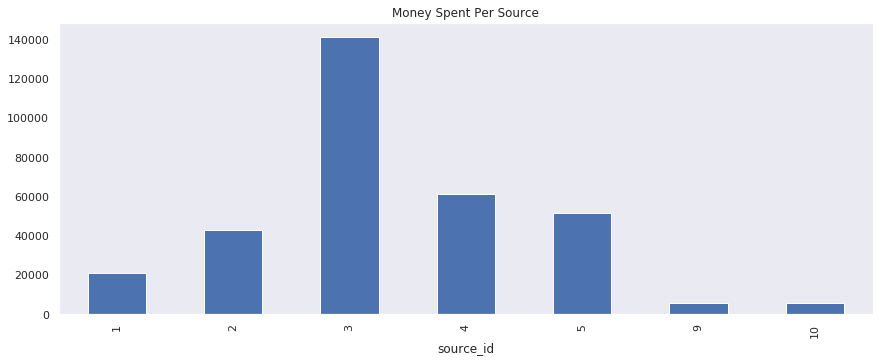

In [51]:
#Money spent per Source
costs.groupby('source_id')['costs'].sum().plot(kind = 'bar', figsize = (13,5))
plt.title("Money Spent Per Source")
plt.show()

The calculations above show that the company is obviously spending too much money, so with this bar chart, we can see where most of the spending is going, the management needs to figure out why source is costing to much and how they can cut spending. 

In [52]:
# Let's determine the montly cost

costs['cost_month'] = costs.dt.astype('datetime64[M]')
monthly_cost = costs.groupby('cost_month')['costs'].sum().reset_index()
monthly_cost.columns = ['month', 'monthly_costs']
display(monthly_cost)


,month,monthly_costs
0,2017-06-01,18015.00
1,2017-07-01,18240.59
2,2017-08-01,14790.54
3,2017-09-01,24368.91
4,2017-10-01,36322.88
5,2017-11-01,37907.88
6,2017-12-01,38315.35
7,2018-01-01,33518.52
8,2018-02-01,32723.03
9,2018-03-01,30415.27


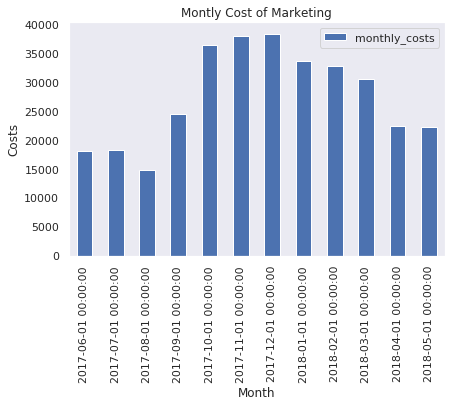

In [53]:
# Let's visualize the montly cost.
monthly_cost.plot(x='month', kind='bar')
plt.title('Montly Cost of Marketing')
plt.ylabel('Costs', fontsize=12)
plt.xlabel('Month', fontsize=12)
plt.show()

This chart is in direct correlation with monthly_costs output. Looks like the management figured out a way to cut cost by in 2018 compare to what it was in 2017

### How worthwhile were the investments? (ROI)

,source_id,costs
0,3,141321.63
1,4,61073.60
2,5,51757.10
3,2,42806.04
4,1,20833.27
5,10,5822.49
6,9,5517.49


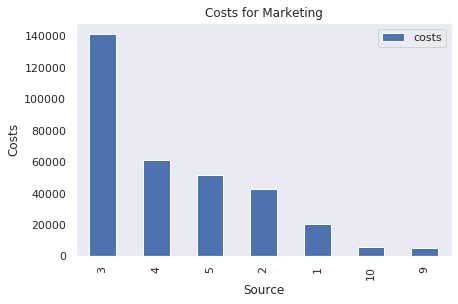

In [54]:
# cost of marketing per source
costs_source = costs.groupby('source_id')['costs'].sum()
costs_source = costs_source.sort_values(ascending=False).reset_index()
display(costs_source)

costs_source.plot(x='source_id', kind='bar')
plt.title('Costs for Marketing')
plt.ylabel('Costs', fontsize=12)
plt.xlabel('Source', fontsize=12)
plt.show()

Source 3 has the highest cost 

In [55]:
#let's determine the cost per month 
costs['cost_month'] = costs.dt.astype('datetime64[M]')
costs_month = costs.groupby('cost_month')['costs'].sum().reset_index()
costs_month.columns = ['month', 'month_costs']
display(costs_month)



,month,month_costs
0,2017-06-01,18015.00
1,2017-07-01,18240.59
2,2017-08-01,14790.54
3,2017-09-01,24368.91
4,2017-10-01,36322.88
5,2017-11-01,37907.88
6,2017-12-01,38315.35
7,2018-01-01,33518.52
8,2018-02-01,32723.03
9,2018-03-01,30415.27


Again source 3 cost the most

In [56]:
costs_source_per_month = costs.groupby(['cost_month', 'source_id'])['costs'].sum().round().astype('int').reset_index()
display(costs_source_per_month.head())

,cost_month,source_id,costs
0,2017-06-01,1,1126
1,2017-06-01,2,2427
2,2017-06-01,3,7732
3,2017-06-01,4,3515
4,2017-06-01,5,2616


In [57]:
costs_source['n_customers']=ltv['n_customers']
costs_source['revenue']=ltv['revenue']


In [58]:
visits.rename(columns = {'source id':'source_id'}, inplace = True)

In [59]:
orders["source_id"]=visits["source_id"]

In [60]:
orders.head(3)

,buy ts,revenue,uid,Buy ts,order_date,order_month,source_id
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01 00:10:00,2017-06-01,2017-06-01,4.0
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01 00:25:00,2017-06-01,2017-06-01,2.0
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01 00:27:00,2017-06-01,2017-06-01,NaN


In [61]:
#Let's determine cac per "buyers"

orders_source = orders.groupby('source_id').agg({'uid':'nunique'}).round().reset_index()
#orders_source = orders.sort_values('buy ts').groupby('uid')['source_id'].first()
#orders_source['source_id'].reset_index(inplace=True)

source_orders_per_cost = pd.merge(orders_source, costs_source,  on='source_id')

source_orders_per_cost['cac'] = source_orders_per_cost['costs'] / source_orders_per_cost['n_customers']

source_orders_per_cost.sort_values(by=['cac'], ascending=False)

,source_id,uid,costs,n_customers,revenue,cac
2,3.0,9259,141321.63,2023,24031.69,69.857454
4,5.0,7224,51757.10,1370,11606.26,37.778905
3,4.0,10877,61073.60,1923,16127.92,31.759542
1,2.0,5456,42806.04,2581,34676.32,16.585060
0,1.0,4114,20833.27,4340,27603.45,4.800293
6,10.0,1184,5822.49,4081,26098.99,1.426731
5,9.0,1584,5517.49,4383,33485.74,1.258839


In [65]:
# let's determine the CAC per source
source_cac = pd.merge(orders_source, costs_source, on = 'source_id')
source_cac['uid']=source_orders_per_cost['uid']
source_cac['cac'] = source_cac['costs']/source_cac['uid']
source_cac

,source_id,uid,costs,n_customers,revenue,cac
0,1.0,4114,20833.27,4340,27603.45,5.063994
1,2.0,5456,42806.04,2581,34676.32,7.845682
2,3.0,9259,141321.63,2023,24031.69,15.263163
3,4.0,10877,61073.60,1923,16127.92,5.614931
4,5.0,7224,51757.10,1370,11606.26,7.164604
5,9.0,1584,5517.49,4383,33485.74,3.483264
6,10.0,1184,5822.49,4081,26098.99,4.917644


In [66]:
# converting the order "month" datatype

orders['month'] = orders['order_month'].dt.strftime('%Y-%m')
orders_month = orders.groupby('month').uid.nunique().reset_index()
orders_month['month']=pd.to_datetime(orders_month['month'], infer_datetime_format=True)

In [67]:
month_cac = pd.merge(orders_month, costs_month, on = 'month')
month_cac['cac'] = month_cac['month_costs']/month_cac['uid']
report
display(month_cac)

,month,uid,month_costs,cac
0,2017-06-01,2023,18015.00,8.905091
1,2017-07-01,1984,18240.59,9.193846
2,2017-08-01,1472,14790.54,10.047921
3,2017-09-01,2750,24368.91,8.861422
4,2017-10-01,4675,36322.88,7.769600
5,2017-11-01,4547,37907.88,8.336899
6,2017-12-01,4942,38315.35,7.753005
7,2018-01-01,3898,33518.52,8.598902
8,2018-02-01,4258,32723.03,7.685070
9,2018-03-01,4181,30415.27,7.274640


In [68]:
print("the average customer acquisition value by month is: {}".format(round(month_cac.cac.mean(), 2)))

the average customer acquisition value by month is: 8.24


### How much did customer acquisition from each of the sources cost?

In [69]:
# finding the LTV ratio per renevue and number of customers 

report['ltv'] = report['revenue'] / report['n_customers']

In [70]:
month_cac.rename(columns={'month':'order_month'}, inplace=True)
month_cac['order_month'] = month_cac['order_month'].astype('datetime64[M]')
report
month_cac

,order_month,uid,month_costs,cac
0,2017-06-01,2023,18015.00,8.905091
1,2017-07-01,1984,18240.59,9.193846
2,2017-08-01,1472,14790.54,10.047921
3,2017-09-01,2750,24368.91,8.861422
4,2017-10-01,4675,36322.88,7.769600
5,2017-11-01,4547,37907.88,8.336899
6,2017-12-01,4942,38315.35,7.753005
7,2018-01-01,3898,33518.52,8.598902
8,2018-02-01,4258,32723.03,7.685070
9,2018-03-01,4181,30415.27,7.274640


In [71]:
romi = pd.merge(report, month_cac, on='order_month')
romi['romi'] = romi['ltv']/romi['cac']


In [72]:
romi.head(3)

,first_order_month,n_customers,ltv,order_month,revenue,age,uid,month_costs,cac,romi
0,2017-06-01,2023,4.724414,2017-06-01,9557.49,0,2023,18015.00,8.905091,0.530530
1,2017-06-01,2023,0.485329,2017-07-01,981.82,1,1984,18240.59,9.193846,0.052788
2,2017-07-01,1923,6.010218,2017-07-01,11557.65,0,1984,18240.59,9.193846,0.653722


In [73]:
output = romi.pivot_table(
    index='first_order_month', 
    columns='age', 
    values='romi', 
    aggfunc='mean')

output = output.cumsum(axis=1).round(decimals=2)
output.fillna('')

age,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06-01,0.53,0.58,0.63,0.73,0.87,0.95,1.08,1.14,1.22,1.3,1.37,1.41
2017-07-01,0.65,0.69,0.76,0.8,0.82,0.84,0.86,0.88,0.9,0.92,0.94,
2017-08-01,0.53,0.58,0.64,0.68,0.75,0.78,0.81,0.86,0.9,0.93,,
2017-09-01,0.64,0.78,0.84,1.36,1.4,1.49,1.58,1.61,1.64,,,
2017-10-01,0.64,0.71,0.73,0.75,0.77,0.79,0.8,0.82,,,,
2017-11-01,0.62,0.67,0.69,0.74,0.76,0.76,0.78,,,,,
2017-12-01,0.61,0.64,0.76,0.91,0.95,1,,,,,,
2018-01-01,0.48,0.52,0.56,0.58,0.59,,,,,,,
2018-02-01,0.54,0.58,0.59,0.6,,,,,,,,


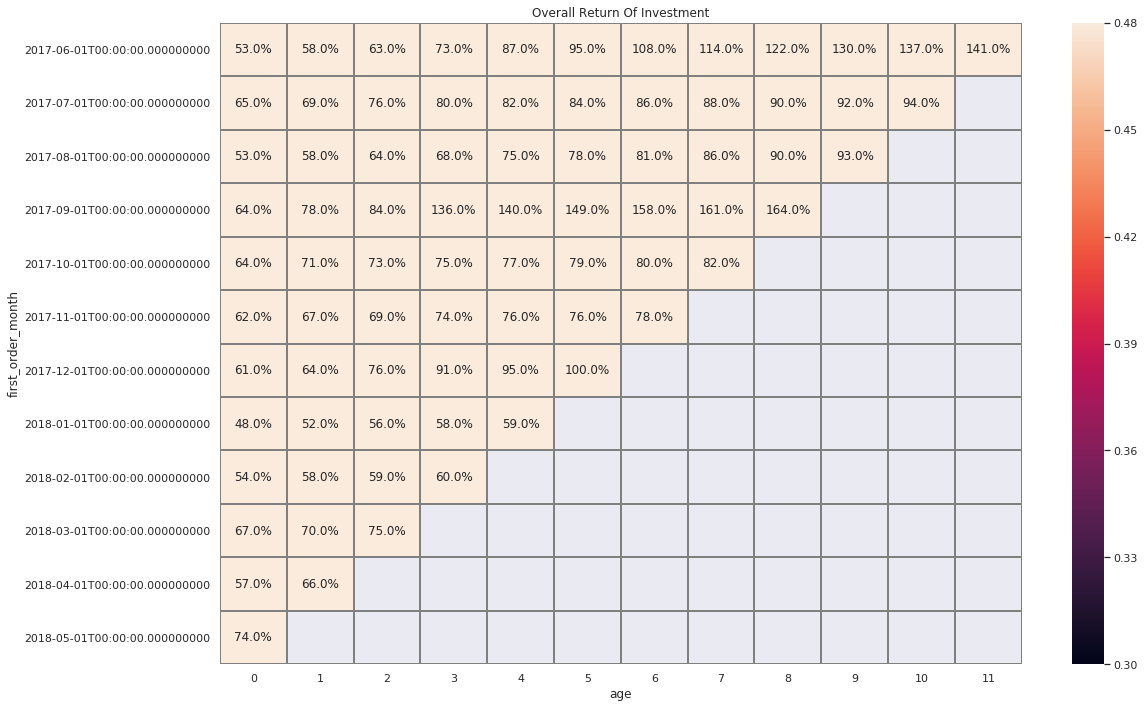

In [74]:
#creating heatmap for overall ROI
sns.set(style='dark')
plt.figure(figsize=(16, 11))
plt.title('Overall Return Of Investment')
sns.heatmap(output, annot=True, fmt='.1%', vmax = .3, linewidths=1, linecolor='gray'); 

Source ID 3 has the hight costs but not the highest revenue. On the other hand, source ID 1 has a significant lower cost but the highest revenue. Souce ID 4 has double the revenue of its marketing cost. So something is no right with the marketing strategy of Source ID 1 - this is maybe a bit too early to conclude - let's determine the ROMI

# Conclusion

Analysis Recap: The company gets 987 visit sessions per day with 1.08 average sessions per users. User clearly prefer Desktop over touch. Overall, visitors spend 10 minutes on the site in average. There are approximately 50-300 orders per day. Most productive month June, September, and December 2017

Overall assement: the company tends to spend more than it generates revenue in certain areas. However, the business seems healtly as a whole.

Suggestions: The company is getting a lot traffic but those visitors do not turn into customers at a higher rate. The company is also spending a lot of money to attract those customers or just in general a higer acquision cost. A comparision year to year cannot not be fully done as 2018 is still going on ( on this analysis) My advise for marketing experts at Yandex.Afisha would be to revise the marketing cost and strategy used on source_id 3 ( high cost and low return). Duplicating the strategy used for source_Ids 2 & 1 would probably be beneficial. 